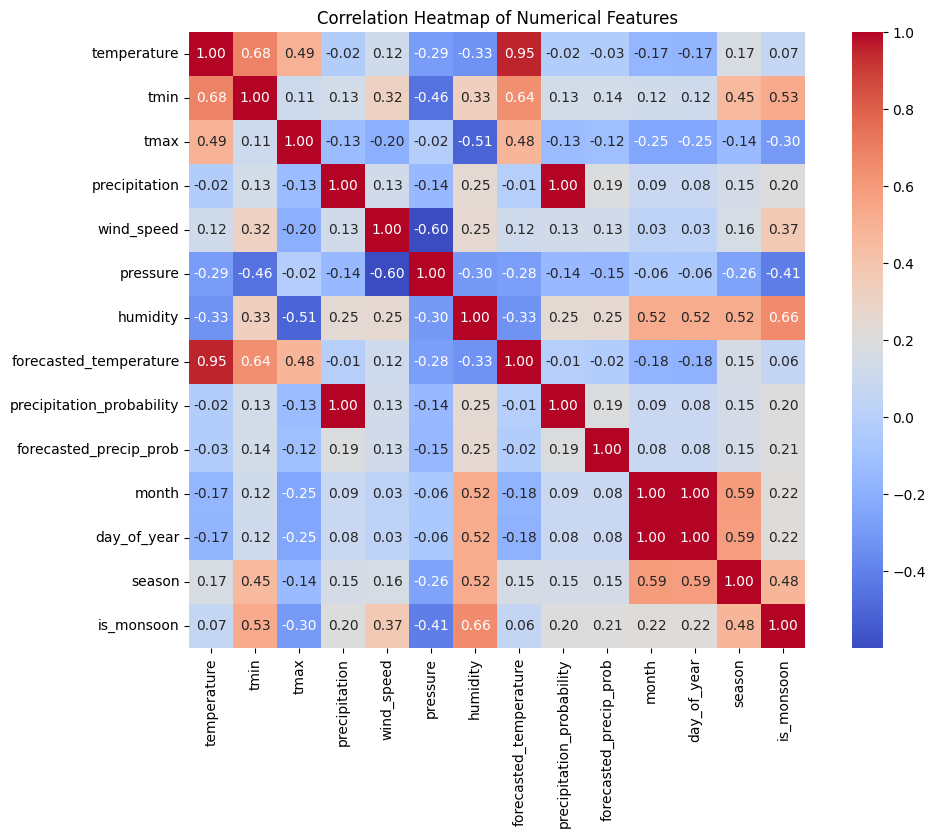

In [7]:
# Re-import necessary packages after kernel reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the uploaded CSV file
file_path = 'pune_weather_processed.csv'
df = pd.read_csv(file_path)

# Convert 'date_time' to datetime
df['date_time'] = pd.to_datetime(df['date_time'])

# 1. Correlation Heatmap
correlation_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



## This heatmap shows how strongly numerical weather features are related to each other using correlation values (from -1 to 1). Key takeaways:

#### Temperature, tmin, tmax, and forecasted_temperature are highly positively correlated — they move together.

#### Humidity is moderately correlated with is_monsoon, season, and tmin, suggesting weather patterns shift during monsoon.

#### Precipitation and pressure have weak correlations with temperature, meaning they vary more independently.

#### It helps identify which features are related, guiding feature selection and improving model performance.










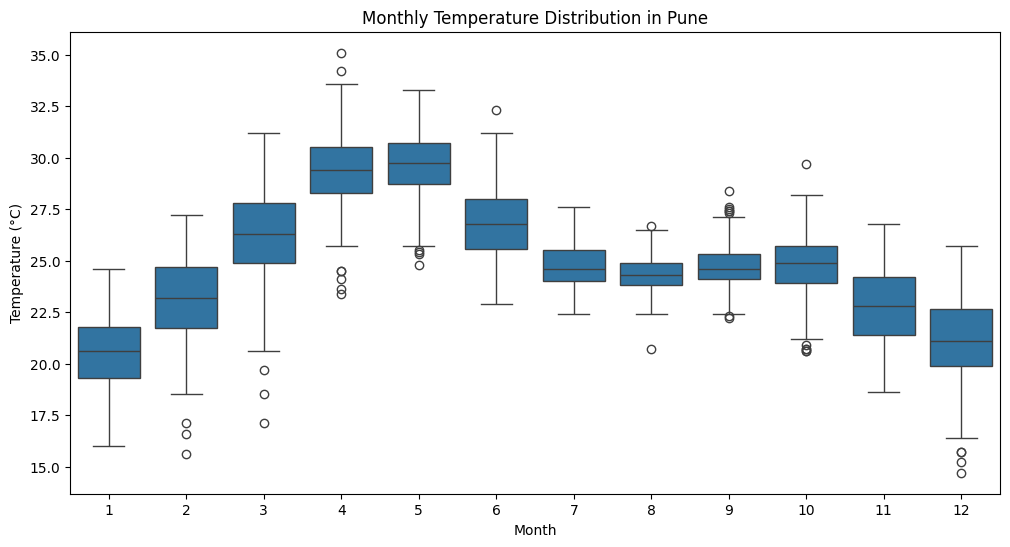

In [8]:

# 3. Box Plot: Monthly Temperature Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='temperature', data=df)
plt.title('Monthly Temperature Distribution in Pune')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

C:\Users\SAGA\AppData\Local\Temp\ipykernel_23156\1117278731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='precipitation', data=monthly_rainfall, palette='Blues_d')


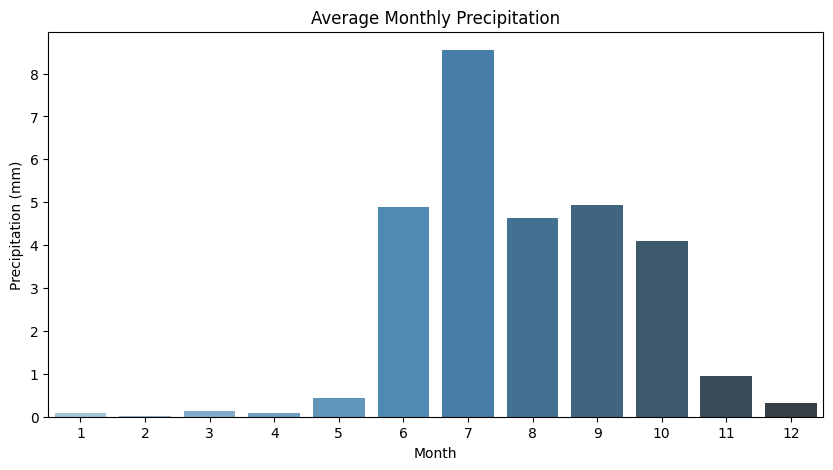

In [9]:
# 4. Bar Plot: Average Rainfall by Month
monthly_rainfall = df.groupby('month')['precipitation'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='precipitation', data=monthly_rainfall, palette='Blues_d')
plt.title('Average Monthly Precipitation')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.show()


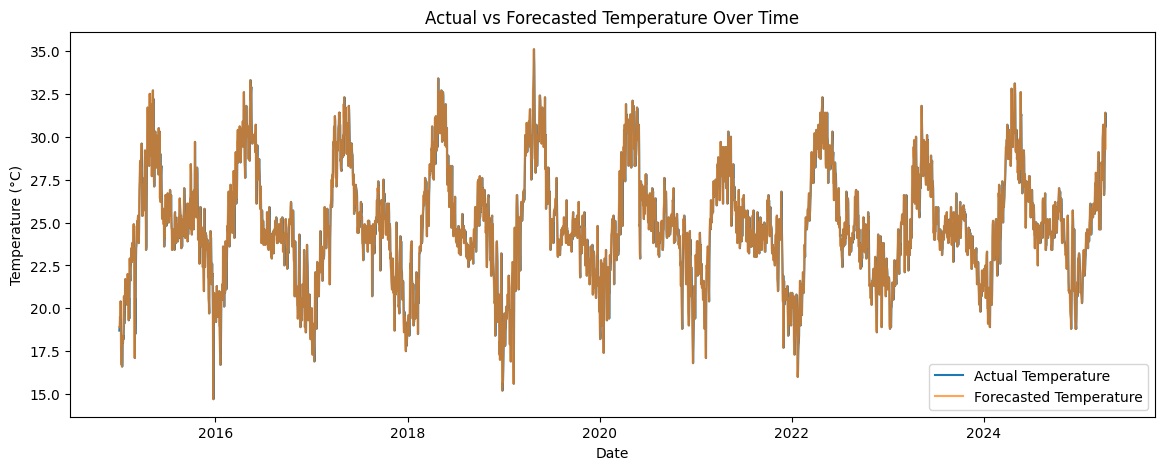

In [10]:
# 2. Time Series Plot: Actual vs Forecasted Temperature
plt.figure(figsize=(14, 5))
plt.plot(df['date_time'], df['temperature'], label='Actual Temperature')
plt.plot(df['date_time'], df['forecasted_temperature'], label='Forecasted Temperature', alpha=0.7)
plt.legend()
plt.title('Actual vs Forecasted Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()


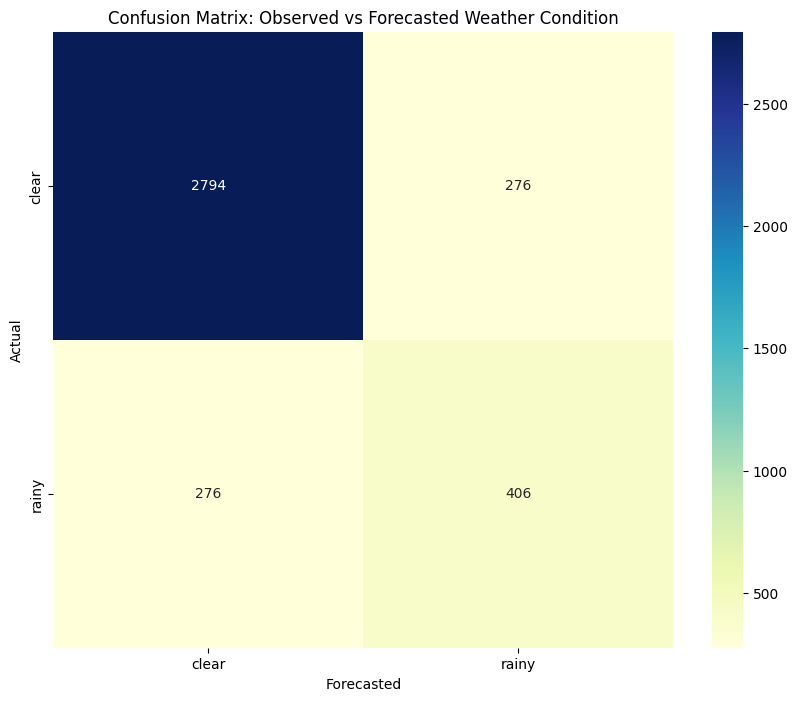

In [11]:

# 5. Confusion Matrix for Weather Condition
conf_matrix = pd.crosstab(df['weather_condition'], df['forecasted_condition'])
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix: Observed vs Forecasted Weather Condition')
plt.xlabel('Forecasted')
plt.ylabel('Actual')
plt.show()

#